In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import importlib
import os
import warnings
import time

from packages import tools
from packages import models

from sklearn import metrics

warnings.filterwarnings("ignore")

In [2]:
# Read in the datasets
prices = tools.read_price_data()

bm_prices = tools.read_bm_price_data()

wind_forecast = tools.read_forecast_data("Wind")
demand_forecast = tools.read_forecast_data("Demand")
planned = pd.concat([wind_forecast, demand_forecast], axis=1)

bid_curves = tools.read_curve_data()

# Naive

In [3]:
importlib.reload(tools)
importlib.reload(models)

naive_1d = models.naive(1, "D")
naive_7d = models.naive(7, "D")
naive_1y = models.naive(1, "Y")

_, res_naive1d, rmse_naive1d, mae_naive1d = tools.walk_forward_evaluation(naive_1d, price_data=prices, start=dt.datetime(2020,1,1), end=dt.datetime(2020,7,9))
_, res_naive7d, rmse_naive7d, mae_naive7d = tools.walk_forward_evaluation(naive_7d, price_data=prices, start=dt.datetime(2020,1,1), end=dt.datetime(2020,7,9))
_, res_naive1y, rmse_naive1y, mae_naive1y = tools.walk_forward_evaluation(naive_1y, price_data=prices, start=dt.datetime(2020,1,1), end=dt.datetime(2020,7,9))

Finished forecast for 2020-01-01.
Finished forecast for 2020-01-02.
Finished forecast for 2020-01-03.
Finished forecast for 2020-01-04.
Finished forecast for 2020-01-05.
Finished forecast for 2020-01-06.
Finished forecast for 2020-01-07.
Finished forecast for 2020-01-08.
Finished forecast for 2020-01-09.
Finished forecast for 2020-01-10.
Finished forecast for 2020-01-11.
Finished forecast for 2020-01-12.
Finished forecast for 2020-01-13.
Finished forecast for 2020-01-14.
Finished forecast for 2020-01-15.
Finished forecast for 2020-01-16.
Finished forecast for 2020-01-17.
Finished forecast for 2020-01-18.
Finished forecast for 2020-01-19.
Finished forecast for 2020-01-20.
Finished forecast for 2020-01-21.
Finished forecast for 2020-01-22.
Finished forecast for 2020-01-23.
Finished forecast for 2020-01-24.
Finished forecast for 2020-01-25.
Finished forecast for 2020-01-26.
Finished forecast for 2020-01-27.
Finished forecast for 2020-01-28.
Finished forecast for 2020-01-29.
Finished forec

Finished forecast for 2020-03-05.
Finished forecast for 2020-03-06.
Finished forecast for 2020-03-07.
Finished forecast for 2020-03-08.
Finished forecast for 2020-03-09.
Finished forecast for 2020-03-10.
Finished forecast for 2020-03-11.
Finished forecast for 2020-03-12.
Finished forecast for 2020-03-13.
Finished forecast for 2020-03-14.
Finished forecast for 2020-03-15.
Finished forecast for 2020-03-16.
Finished forecast for 2020-03-17.
Finished forecast for 2020-03-18.
Finished forecast for 2020-03-19.
Finished forecast for 2020-03-20.
Finished forecast for 2020-03-21.
Finished forecast for 2020-03-22.
Finished forecast for 2020-03-23.
Finished forecast for 2020-03-24.
Finished forecast for 2020-03-25.
Finished forecast for 2020-03-26.
Finished forecast for 2020-03-27.
Finished forecast for 2020-03-28.
Finished forecast for 2020-03-29.
Finished forecast for 2020-03-30.
Finished forecast for 2020-03-31.
Finished forecast for 2020-04-01.
Finished forecast for 2020-04-02.
Finished forec

Finished forecast for 2020-05-04.
Finished forecast for 2020-05-05.
Finished forecast for 2020-05-06.
Finished forecast for 2020-05-07.
Finished forecast for 2020-05-08.
Finished forecast for 2020-05-09.
Finished forecast for 2020-05-10.
Finished forecast for 2020-05-11.
Finished forecast for 2020-05-12.
Finished forecast for 2020-05-13.
Finished forecast for 2020-05-14.
Finished forecast for 2020-05-15.
Finished forecast for 2020-05-16.
Finished forecast for 2020-05-17.
Finished forecast for 2020-05-18.
Finished forecast for 2020-05-19.
Finished forecast for 2020-05-20.
Finished forecast for 2020-05-21.
Finished forecast for 2020-05-22.
Finished forecast for 2020-05-23.
Finished forecast for 2020-05-24.
Finished forecast for 2020-05-25.
Finished forecast for 2020-05-26.
Finished forecast for 2020-05-27.
Finished forecast for 2020-05-28.
Finished forecast for 2020-05-29.
Finished forecast for 2020-05-30.
Finished forecast for 2020-05-31.
Finished forecast for 2020-06-01.
Finished forec

Each naive model takes less than 2 seconds for the whole period

In [5]:
print("RMSEs:")
print(f"naive_1d: {rmse_naive1d.round(2)}")
print(f"naive_7d: {rmse_naive7d.round(2)}")
print(f"naive_1y: {rmse_naive1y.round(2)}")
print("\nMAEs:")
print(f"naive_1d: {mae_naive1d.round(2)}")
print(f"naive_7d: {mae_naive7d.round(2)}")
print(f"naive_1y: {mae_naive1y.round(2)}")

RMSEs:
naive_1d: 15.69
naive_7d: 17.07
naive_1y: 33.02

MAEs:
naive_1d: 10.54
naive_7d: 11.59
naive_1y: 25.32


if not os.path.exists("Results"):
    os.mkdir("Results")
    
res_naive1d.to_csv("Results/naive_1d_forecasts.csv")
res_naive7d.to_csv("Results/naive_7d_forecasts.csv")
res_naive1y.to_csv("Results/naive_1y_forecasts.csv")

# Random Forests

In [6]:
importlib.reload(tools)
importlib.reload(models)

model_params = {
    "n_estimators": 100,
    "max_depth": 26,
    "max_features": 15,
    "n_jobs": -1
}

lag_params = {
    "price_lags": [24,48,72,96,120,144,168],
    "bm_price_lags": [24,48,72,96,120,144,168],
    "planned_lags": [0,24,48,72,96,120,144,168]
}

rf_model = models.random_forest(model_params, lag_params)
rf_model, rf_res, rf_rmse, rf_mae = tools.walk_forward_evaluation(rf_model, prices, bm_prices, planned, start=dt.datetime(2020,1,1), end=dt.datetime(2020,7,9))

Finished forecast for 2020-01-01.
Finished forecast for 2020-01-02.
Finished forecast for 2020-01-03.
Finished forecast for 2020-01-04.
Finished forecast for 2020-01-05.
Finished forecast for 2020-01-06.
Finished forecast for 2020-01-07.
Finished forecast for 2020-01-08.
Finished forecast for 2020-01-09.
Finished forecast for 2020-01-10.
Finished forecast for 2020-01-11.
Finished forecast for 2020-01-12.
Finished forecast for 2020-01-13.
Finished forecast for 2020-01-14.
Finished forecast for 2020-01-15.
Finished forecast for 2020-01-16.
Finished forecast for 2020-01-17.
Finished forecast for 2020-01-18.
Finished forecast for 2020-01-19.
Finished forecast for 2020-01-20.
Finished forecast for 2020-01-21.
Finished forecast for 2020-01-22.
Finished forecast for 2020-01-23.
Finished forecast for 2020-01-24.
Finished forecast for 2020-01-25.
Finished forecast for 2020-01-26.
Finished forecast for 2020-01-27.
Finished forecast for 2020-01-28.
Finished forecast for 2020-01-29.
Finished forec

514 seconds $\approx$ 8.57 minutes

if not os.path.exists("Results"):
    os.mkdir("Results")
    
rf_res.to_csv("Results/rf_forecasts.csv")
rf_model.variable_importances.to_csv("Results/rf_vi.csv")

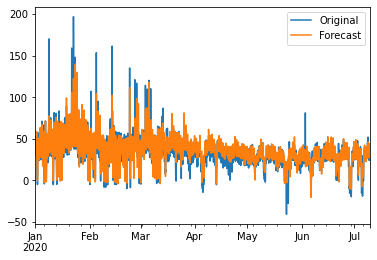

In [7]:
rf_res.plot()
plt.show()

In [8]:
print("RF:")
print("RMSE:", rf_rmse)
print("MAE:", rf_mae)

RF:
RMSE: 8.306727870367082
MAE: 5.889488035230462


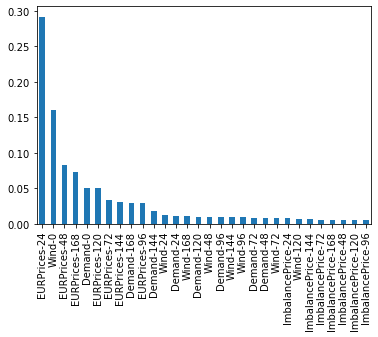

In [9]:
rf_model.variable_importances.mean(axis=1).sort_values(ascending=False).plot.bar()
plt.show()

# Time Series

## AR

In [10]:
importlib.reload(tools)
importlib.reload(models)

lag_dependencies = [list(range(24,n*24+1,24)) for n in range(1,8)]

model_params = {
    "lags": lag_dependencies,
    "trend": "ct",
    "ic": "aic",
    "exog": False,
}

lag_params = {
    "bm_price_lags": [24,48,72,96,120,144,168],
    "planned_lags": [0,24,48,72,96,120,144,168]
}

ar_model = models.ARX(model_params, lag_params)
ar_model, ar_res, ar_rmse, ar_mae = tools.walk_forward_evaluation(ar_model, prices, bm_prices, planned, start=dt.datetime(2020,1,1), end=dt.datetime(2020,7,9))

Finished forecast for 2020-01-01.
Finished forecast for 2020-01-02.
Finished forecast for 2020-01-03.
Finished forecast for 2020-01-04.
Finished forecast for 2020-01-05.
Finished forecast for 2020-01-06.
Finished forecast for 2020-01-07.
Finished forecast for 2020-01-08.
Finished forecast for 2020-01-09.
Finished forecast for 2020-01-10.
Finished forecast for 2020-01-11.
Finished forecast for 2020-01-12.
Finished forecast for 2020-01-13.
Finished forecast for 2020-01-14.
Finished forecast for 2020-01-15.
Finished forecast for 2020-01-16.
Finished forecast for 2020-01-17.
Finished forecast for 2020-01-18.
Finished forecast for 2020-01-19.
Finished forecast for 2020-01-20.
Finished forecast for 2020-01-21.
Finished forecast for 2020-01-22.
Finished forecast for 2020-01-23.
Finished forecast for 2020-01-24.
Finished forecast for 2020-01-25.
Finished forecast for 2020-01-26.
Finished forecast for 2020-01-27.
Finished forecast for 2020-01-28.
Finished forecast for 2020-01-29.
Finished forec

33.71 seconds $\approx$ 0.55 minutes

if not os.path.exists("Results"):
    os.mkdir("Results")
    
ar_res.to_csv("Results/ar_forecasts.csv")

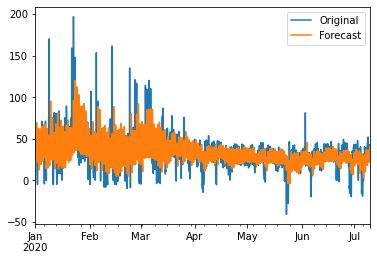

In [11]:
ar_res.plot()
plt.show()

In [12]:
print("AR:")
print("RMSE:", ar_rmse)
print("MAE:", ar_mae)

AR:
RMSE: 13.07701166142903
MAE: 9.049276238953324


## ARX

In [13]:
importlib.reload(tools)
importlib.reload(models)

lag_dependencies = [list(range(24,n*24+1,24)) for n in range(1,8)]

model_params = {
    "lags": lag_dependencies,
    "trend": "ct",
    "ic": "aic",
    "exog": True,
}

lag_params = {
    "bm_price_lags": [24,48,72,96,120,144,168],
    "planned_lags": [0,24,48,72,96,120,144,168]
}

arx_model = models.ARX(model_params, lag_params)
arx_model, arx_res, arx_rmse, arx_mae = tools.walk_forward_evaluation(arx_model, prices, bm_prices, planned, start=dt.datetime(2020,1,1), end=dt.datetime(2020,7,9))

Finished forecast for 2020-01-01.
Finished forecast for 2020-01-02.
Finished forecast for 2020-01-03.
Finished forecast for 2020-01-04.
Finished forecast for 2020-01-05.
Finished forecast for 2020-01-06.
Finished forecast for 2020-01-07.
Finished forecast for 2020-01-08.
Finished forecast for 2020-01-09.
Finished forecast for 2020-01-10.
Finished forecast for 2020-01-11.
Finished forecast for 2020-01-12.
Finished forecast for 2020-01-13.
Finished forecast for 2020-01-14.
Finished forecast for 2020-01-15.
Finished forecast for 2020-01-16.
Finished forecast for 2020-01-17.
Finished forecast for 2020-01-18.
Finished forecast for 2020-01-19.
Finished forecast for 2020-01-20.
Finished forecast for 2020-01-21.
Finished forecast for 2020-01-22.
Finished forecast for 2020-01-23.
Finished forecast for 2020-01-24.
Finished forecast for 2020-01-25.
Finished forecast for 2020-01-26.
Finished forecast for 2020-01-27.
Finished forecast for 2020-01-28.
Finished forecast for 2020-01-29.
Finished forec

61.48 seconds $\approx$ 1 minute

if not os.path.exists("Results"):
    os.mkdir("Results")
    
arx_res.to_csv("Results/arx_forecasts.csv")

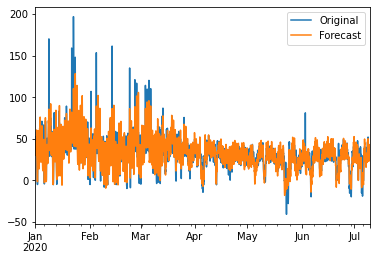

In [14]:
arx_res.plot()
plt.show()

In [15]:
print("ARX:")
print("RMSE:", arx_rmse)
print("MAE:", arx_mae)

ARX:
RMSE: 8.791408643272991
MAE: 6.418202391802511


## SARIMA

In [ ]:
importlib.reload(tools)
importlib.reload(models)

model_params = {
    "exog": False,
    "trend": "n",
    "order": (4,1,4),
    "seasonal_order": (0,1,1,24),
    "method": "lbfgs",
    "maxiter": 30,
    "disp": True,
}

lag_params = {
    "bm_price_lags": [24,48,72,96,120,144,168],
    "planned_lags": [0,24,48,72,96,120,144,168]
}

sarima_model = models.SARIMAX(model_params, lag_params)
sarima_model, sarima_res, sarima_rmse, sarima_mae = tools.walk_forward_evaluation(sarima_model, prices, bm_prices, planned, start=dt.datetime(2020,1,1), end=dt.datetime(2020,7,9))

 30931.78 seconds $\approx$ 515.53 minutes $\approx$ 8.59 hours

if not os.path.exists("Results"):
    os.mkdir("Results")
    
sarima_res.to_csv("Results/sarima_forecasts.csv")

In [ ]:
sarima_res.plot()
plt.show()

In [ ]:
print("SARIMA:")
print("RMSE:", sarima_rmse)
print("MAE:", sarima_mae)

## SARIMAX

In [ ]:
importlib.reload(tools)
importlib.reload(models)

model_params = {
    "exog": True,
    "trend": "n",
    "order": (4,1,4),
    "seasonal_order": (0,1,1,24),
    "method": "lbfgs",
    "maxiter": 100,
    "disp": True,
}

lag_params = {
    "bm_price_lags": [24,48,72,96,120,144,168],
    "planned_lags": [0,24,48,72,96,120,144,168]
}

sarimax_model = models.SARIMAX(model_params, lag_params)
sarimax_model, sarimax_res, sarimax_rmse, sarimax_mae = tools.walk_forward_evaluation(sarimax_model, prices, bm_prices, planned, start=dt.datetime(2020,1,1), end=dt.datetime(2020,7,9))

23117.86 seconds $\approx$ 385.28 minutes $\approx$ 6.42 hours

if not os.path.exists("Results"):
    os.mkdir("Results")
    
sarimax_res.to_csv("Results/sarimax_forecasts.csv")

In [ ]:
sarimax_res.plot()
plt.show()

In [ ]:
print("SARIMAX:")
print("RMSE:", sarimax_rmse)
print("MAE:", sarimax_mae)

## FFNNs

No. of neurons per layer: 12 neurons per layer

In [16]:
importlib.reload(tools)
importlib.reload(models)

lag_params = {
    "price_lags": [24,48,72,96,120,144,168],
    "bm_price_lags": [24,48,72,96,168],
    "planned_lags": [0,24,48,72,96,168]
}

model_params = {
    "init_params": {
        "num_of_nodes": (len(lag_params["price_lags"])+len(lag_params["bm_price_lags"])+2*len(lag_params["planned_lags"]))/2,
        "input_cols": len(lag_params["price_lags"])+len(lag_params["bm_price_lags"])+2*len(lag_params["planned_lags"]),
        "act_fn": "sigmoid",
    },
    "train_params": {
        "validation_split": 0,
        "verbose": 0
    },
    "other_params": {
        "init_epochs": 2200,
        "subseq_epochs": 500,
        "GPU": True
    }
}

sigmoid_ffnn_model = models.ffnn(model_params, lag_params)
sigmoid_ffnn_model, sigmoid_ffnn_res, sigmoid_ffnn_rmse, sigmoid_ffnn_mae = tools.walk_forward_evaluation(sigmoid_ffnn_model, prices, bm_prices, planned, start=dt.datetime(2020,1,1), end=dt.datetime(2020,7,9))

Finished forecast for 2020-01-01.
Finished forecast for 2020-01-02.
Finished forecast for 2020-01-03.
Finished forecast for 2020-01-04.
Finished forecast for 2020-01-05.
Finished forecast for 2020-01-06.
Finished forecast for 2020-01-07.
Finished forecast for 2020-01-08.
Finished forecast for 2020-01-09.
Finished forecast for 2020-01-10.
Finished forecast for 2020-01-11.
Finished forecast for 2020-01-12.
Finished forecast for 2020-01-13.
Finished forecast for 2020-01-14.
Finished forecast for 2020-01-15.
Finished forecast for 2020-01-16.
Finished forecast for 2020-01-17.
Finished forecast for 2020-01-18.
Finished forecast for 2020-01-19.
Finished forecast for 2020-01-20.
Finished forecast for 2020-01-21.
Finished forecast for 2020-01-22.
Finished forecast for 2020-01-23.
Finished forecast for 2020-01-24.
Finished forecast for 2020-01-25.
Finished forecast for 2020-01-26.
Finished forecast for 2020-01-27.
Finished forecast for 2020-01-28.
Finished forecast for 2020-01-29.
Finished forec

422 seconds $\approx$ 7.03 minutes

if not os.path.exists("Results"):
    os.mkdir("Results")
    
sigmoid_ffnn_res.to_csv("Results/sigmoid_ffnn_forecasts.csv")

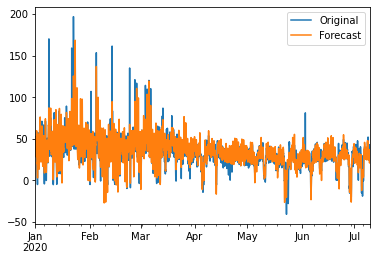

In [17]:
sigmoid_ffnn_res.plot()
plt.show()

In [18]:
print("Sigmoid FFNN:")
print("RMSE:", sigmoid_ffnn_rmse)
print("MAE:", sigmoid_ffnn_mae)

Sigmoid FFNN:
RMSE: 8.286060955426011
MAE: 5.90053461170311


In [19]:
importlib.reload(tools)
importlib.reload(models)

lag_params = {
    "price_lags": [24,48,72,96,120,144,168],
    "bm_price_lags": [24,48,72,96,168],
    "planned_lags": [0,24,48,72,96,168]
}

model_params = {
    "init_params": {
        "num_of_nodes": (len(lag_params["price_lags"])+len(lag_params["bm_price_lags"])+2*len(lag_params["planned_lags"]))/2,
        "input_cols": len(lag_params["price_lags"])+len(lag_params["bm_price_lags"])+2*len(lag_params["planned_lags"]),
        "act_fn": "tanh",
    },
    "train_params": {
        "validation_split": 0,
        "verbose": 0
    },
    "other_params": {
        "init_epochs": 2200,
        "subseq_epochs": 500,
        "GPU": True
    }
}
tanh_ffnn_model = models.ffnn(model_params, lag_params)
tanh_ffnn_model, tanh_ffnn_res, tanh_ffnn_rmse, tanh_ffnn_mae = tools.walk_forward_evaluation(tanh_ffnn_model, prices, bm_prices, planned, start=dt.datetime(2020,1,1), end=dt.datetime(2020,7,9))

Finished forecast for 2020-01-01.
Finished forecast for 2020-01-02.
Finished forecast for 2020-01-03.
Finished forecast for 2020-01-04.
Finished forecast for 2020-01-05.
Finished forecast for 2020-01-06.
Finished forecast for 2020-01-07.
Finished forecast for 2020-01-08.
Finished forecast for 2020-01-09.
Finished forecast for 2020-01-10.
Finished forecast for 2020-01-11.
Finished forecast for 2020-01-12.
Finished forecast for 2020-01-13.
Finished forecast for 2020-01-14.
Finished forecast for 2020-01-15.
Finished forecast for 2020-01-16.
Finished forecast for 2020-01-17.
Finished forecast for 2020-01-18.
Finished forecast for 2020-01-19.
Finished forecast for 2020-01-20.
Finished forecast for 2020-01-21.
Finished forecast for 2020-01-22.
Finished forecast for 2020-01-23.
Finished forecast for 2020-01-24.
Finished forecast for 2020-01-25.
Finished forecast for 2020-01-26.
Finished forecast for 2020-01-27.
Finished forecast for 2020-01-28.
Finished forecast for 2020-01-29.
Finished forec

394.11 seconds $\approx$ 6.56 minutes

if not os.path.exists("Results"):
    os.mkdir("Results")
    
tanh_ffnn_res.to_csv("Results/tanh_ffnn_forecasts.csv")

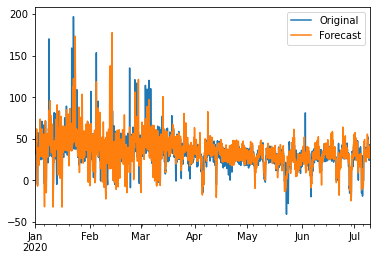

In [20]:
tanh_ffnn_res.plot()
plt.show()

In [21]:
print("Tanh FFNN:")
print("RMSE:", tanh_ffnn_rmse)
print("MAE:", tanh_ffnn_mae)

Tanh FFNN:
RMSE: 10.70150457441956
MAE: 6.883984625763555


In [22]:
importlib.reload(tools)
importlib.reload(models)

lag_params = {
    "price_lags": [24,48,72,96,120,144,168],
    "bm_price_lags": [24,48,72,96,168],
    "planned_lags": [0,24,48,72,96,168]
}

model_params = {
    "init_params": {
        "num_of_nodes": (len(lag_params["price_lags"])+len(lag_params["bm_price_lags"])+2*len(lag_params["planned_lags"]))/2,
        "input_cols": len(lag_params["price_lags"])+len(lag_params["bm_price_lags"])+2*len(lag_params["planned_lags"]),
        "act_fn": "relu",
    },
    "train_params": {
        "validation_split": 0,
        "verbose": 0
    },
    "other_params": {
        "init_epochs": 1000,
        "subseq_epochs": 500,
        "GPU": True
    }
}

relu_ffnn_model = models.ffnn(model_params, lag_params)
relu_ffnn_model, relu_ffnn_res, relu_ffnn_rmse, relu_ffnn_mae = tools.walk_forward_evaluation(relu_ffnn_model, prices, bm_prices, planned, start=dt.datetime(2020,1,1), end=dt.datetime(2020,7,9))

Finished forecast for 2020-01-01.
Finished forecast for 2020-01-02.
Finished forecast for 2020-01-03.
Finished forecast for 2020-01-04.
Finished forecast for 2020-01-05.
Finished forecast for 2020-01-06.
Finished forecast for 2020-01-07.
Finished forecast for 2020-01-08.
Finished forecast for 2020-01-09.
Finished forecast for 2020-01-10.
Finished forecast for 2020-01-11.
Finished forecast for 2020-01-12.
Finished forecast for 2020-01-13.
Finished forecast for 2020-01-14.
Finished forecast for 2020-01-15.
Finished forecast for 2020-01-16.
Finished forecast for 2020-01-17.
Finished forecast for 2020-01-18.
Finished forecast for 2020-01-19.
Finished forecast for 2020-01-20.
Finished forecast for 2020-01-21.
Finished forecast for 2020-01-22.
Finished forecast for 2020-01-23.
Finished forecast for 2020-01-24.
Finished forecast for 2020-01-25.
Finished forecast for 2020-01-26.
Finished forecast for 2020-01-27.
Finished forecast for 2020-01-28.
Finished forecast for 2020-01-29.
Finished forec

1571.46 seconds $\approx$ 26.19 minutes

if not os.path.exists("Results"):
    os.mkdir("Results")
    
relu_ffnn_res.to_csv("Results/relu_ffnn_forecasts.csv")

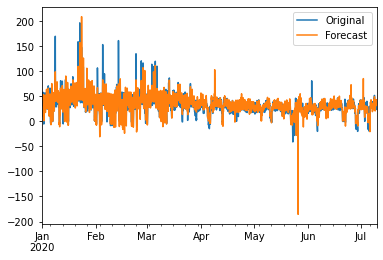

In [23]:
relu_ffnn_res.plot()
plt.show()

In [24]:
print("ReLU FFNN:")
print("RMSE:", relu_ffnn_rmse)
print("MAE:", relu_ffnn_mae)

ReLU FFNN:
RMSE: 9.693089725823313
MAE: 6.411362864446179


## RNNs

In [ ]:
importlib.reload(tools)
importlib.reload(models)

model_params = {
    "init_params": {
        "num_of_blocks": 6,
        "n_timesteps": 7,
        "n_features": 4,
        "act_fn": "sigmoid",
        "n_layers": 3,
    },
    "train_params": {
        "validation_split": 0.2,
        "verbose": 1
    },
    "other_params": {
        "init_epochs": 150,
        "subseq_epochs": 35,
        "GPU": False
    }
}

sigmoid_rnn_model = models.rnn(model_params, None)
sigmoid_rnn_model, sigmoid_rnn_res, sigmoid_rnn_rmse, sigmoid_rnn_mae = tools.walk_forward_evaluation(sigmoid_rnn_model, prices, bm_prices, planned, start=dt.datetime(2020,1,1), end=dt.datetime(2020,7,9))

14,026 seconds $\approx$ 233.77 minutes $\approx$ 3.89 hours

In [ ]:
sigmoid_rnn_res.plot()
plt.show()

In [ ]:
print("Sigmoid RNN:")
print("RMSE:", sigmoid_rnn_rmse)
print("MAE:", sigmoid_rnn_mae)

if not os.path.exists("Results"):
    os.mkdir("Results")
    
sigmoid_rnn_res.to_csv("Results/sigmoid_rnn_forecasts.csv")

In [23]:
importlib.reload(tools)
importlib.reload(models)

model_params = {
    "init_params": {
        "num_of_blocks": 6,
        "n_timesteps": 7,
        "n_features": 4,
        "act_fn": "tanh",
        "n_layers": 3
    },
    "train_params": {
        "validation_split": 0.2,
        "verbose": 1
    },
    "other_params": {
        "init_epochs": 150,
        "subseq_epochs": 35,
        "GPU": False
    }
}

tanh_rnn_model = models.rnn(model_params, None)
tanh_rnn_model, tanh_rnn_res, tanh_rnn_rmse, tanh_rnn_mae = tools.walk_forward_evaluation(tanh_rnn_model, prices, bm_prices, planned, start=dt.datetime(2020,1,1), end=dt.datetime(2020,1,1))

Epoch 1/1500
1/1 [==============================] - 1s 1s/step - loss: 0.4520 - val_loss: 0.4932
Epoch 2/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.4446 - val_loss: 0.4855
Epoch 3/1500
1/1 [==============================] - 0s 22ms/step - loss: 0.4373 - val_loss: 0.4780
Epoch 4/1500
1/1 [==============================] - 0s 22ms/step - loss: 0.4302 - val_loss: 0.4705
Epoch 5/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.4232 - val_loss: 0.4632
Epoch 6/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.4162 - val_loss: 0.4560
Epoch 7/1500
1/1 [==============================] - 0s 21ms/step - loss: 0.4094 - val_loss: 0.4488
Epoch 8/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.4027 - val_loss: 0.4417
Epoch 9/1500
1/1 [==============================] - 0s 24ms/step - loss: 0.3960 - val_loss: 0.4347
Epoch 10/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.3894 - val_loss: 0.4277
Epoch 11/15

1/1 [==============================] - 0s 24ms/step - loss: 0.0169 - val_loss: 0.0107
Epoch 84/1500
1/1 [==============================] - 0s 26ms/step - loss: 0.0166 - val_loss: 0.0107
Epoch 85/1500
1/1 [==============================] - 0s 22ms/step - loss: 0.0162 - val_loss: 0.0107
Epoch 86/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0159 - val_loss: 0.0108
Epoch 87/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0156 - val_loss: 0.0109
Epoch 88/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0154 - val_loss: 0.0111
Epoch 89/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0152 - val_loss: 0.0113
Epoch 90/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0150 - val_loss: 0.0115
Epoch 91/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0148 - val_loss: 0.0117
Epoch 92/1500
1/1 [==============================] - 0s 22ms/step - loss: 0.0147 - val_loss: 0.0119
Epoch 93/1500


1/1 [==============================] - 0s 22ms/step - loss: 0.0095 - val_loss: 0.0077
Epoch 246/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0095 - val_loss: 0.0077
Epoch 247/1500
1/1 [==============================] - 0s 25ms/step - loss: 0.0095 - val_loss: 0.0077
Epoch 248/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0094 - val_loss: 0.0077
Epoch 249/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0094 - val_loss: 0.0076
Epoch 250/1500
1/1 [==============================] - 0s 24ms/step - loss: 0.0094 - val_loss: 0.0076
Epoch 251/1500
1/1 [==============================] - 0s 24ms/step - loss: 0.0094 - val_loss: 0.0076
Epoch 252/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0094 - val_loss: 0.0076
Epoch 253/1500
1/1 [==============================] - 0s 25ms/step - loss: 0.0093 - val_loss: 0.0075
Epoch 254/1500
1/1 [==============================] - 0s 31ms/step - loss: 0.0093 - val_loss: 0.0075
Epoch

1/1 [==============================] - 0s 23ms/step - loss: 0.0084 - val_loss: 0.0070
Epoch 408/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0084 - val_loss: 0.0070
Epoch 409/1500
1/1 [==============================] - 0s 24ms/step - loss: 0.0084 - val_loss: 0.0070
Epoch 410/1500
1/1 [==============================] - 0s 24ms/step - loss: 0.0084 - val_loss: 0.0070
Epoch 411/1500
1/1 [==============================] - 0s 24ms/step - loss: 0.0084 - val_loss: 0.0070
Epoch 412/1500
1/1 [==============================] - 0s 22ms/step - loss: 0.0084 - val_loss: 0.0070
Epoch 413/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0084 - val_loss: 0.0070
Epoch 414/1500
1/1 [==============================] - 0s 25ms/step - loss: 0.0083 - val_loss: 0.0070
Epoch 415/1500
1/1 [==============================] - 0s 22ms/step - loss: 0.0083 - val_loss: 0.0070
Epoch 416/1500
1/1 [==============================] - 0s 22ms/step - loss: 0.0083 - val_loss: 0.0070
Epoch

1/1 [==============================] - 0s 23ms/step - loss: 0.0078 - val_loss: 0.0067
Epoch 570/1500
1/1 [==============================] - 0s 22ms/step - loss: 0.0077 - val_loss: 0.0067
Epoch 571/1500
1/1 [==============================] - 0s 22ms/step - loss: 0.0077 - val_loss: 0.0067
Epoch 572/1500
1/1 [==============================] - 0s 25ms/step - loss: 0.0077 - val_loss: 0.0067
Epoch 573/1500
1/1 [==============================] - 0s 22ms/step - loss: 0.0077 - val_loss: 0.0067
Epoch 574/1500
1/1 [==============================] - 0s 22ms/step - loss: 0.0077 - val_loss: 0.0067
Epoch 575/1500
1/1 [==============================] - 0s 24ms/step - loss: 0.0077 - val_loss: 0.0067
Epoch 576/1500
1/1 [==============================] - 0s 25ms/step - loss: 0.0077 - val_loss: 0.0067
Epoch 577/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0077 - val_loss: 0.0067
Epoch 578/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0077 - val_loss: 0.0067
Epoch

1/1 [==============================] - 0s 23ms/step - loss: 0.0073 - val_loss: 0.0065
Epoch 732/1500
1/1 [==============================] - 0s 28ms/step - loss: 0.0073 - val_loss: 0.0065
Epoch 733/1500
1/1 [==============================] - 0s 26ms/step - loss: 0.0073 - val_loss: 0.0065
Epoch 734/1500
1/1 [==============================] - 0s 27ms/step - loss: 0.0073 - val_loss: 0.0065
Epoch 735/1500
1/1 [==============================] - 0s 25ms/step - loss: 0.0073 - val_loss: 0.0065
Epoch 736/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0073 - val_loss: 0.0065
Epoch 737/1500
1/1 [==============================] - 0s 25ms/step - loss: 0.0073 - val_loss: 0.0065
Epoch 738/1500
1/1 [==============================] - 0s 29ms/step - loss: 0.0072 - val_loss: 0.0064
Epoch 739/1500
1/1 [==============================] - 0s 26ms/step - loss: 0.0072 - val_loss: 0.0064
Epoch 740/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0072 - val_loss: 0.0064
Epoch

1/1 [==============================] - 0s 22ms/step - loss: 0.0069 - val_loss: 0.0060
Epoch 894/1500
1/1 [==============================] - 0s 28ms/step - loss: 0.0069 - val_loss: 0.0060
Epoch 895/1500
1/1 [==============================] - 0s 25ms/step - loss: 0.0069 - val_loss: 0.0060
Epoch 896/1500
1/1 [==============================] - 0s 26ms/step - loss: 0.0069 - val_loss: 0.0060
Epoch 897/1500
1/1 [==============================] - 0s 24ms/step - loss: 0.0069 - val_loss: 0.0060
Epoch 898/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0069 - val_loss: 0.0060
Epoch 899/1500
1/1 [==============================] - 0s 24ms/step - loss: 0.0069 - val_loss: 0.0060
Epoch 900/1500
1/1 [==============================] - 0s 24ms/step - loss: 0.0069 - val_loss: 0.0060
Epoch 901/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0069 - val_loss: 0.0060
Epoch 902/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0069 - val_loss: 0.0060
Epoch

1/1 [==============================] - 0s 27ms/step - loss: 0.0066 - val_loss: 0.0055
Epoch 1055/1500
1/1 [==============================] - 0s 24ms/step - loss: 0.0066 - val_loss: 0.0055
Epoch 1056/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0066 - val_loss: 0.0055
Epoch 1057/1500
1/1 [==============================] - 0s 25ms/step - loss: 0.0066 - val_loss: 0.0055
Epoch 1058/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0066 - val_loss: 0.0055
Epoch 1059/1500
1/1 [==============================] - 0s 22ms/step - loss: 0.0066 - val_loss: 0.0055
Epoch 1060/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0066 - val_loss: 0.0055
Epoch 1061/1500
1/1 [==============================] - 0s 25ms/step - loss: 0.0066 - val_loss: 0.0055
Epoch 1062/1500
1/1 [==============================] - 0s 22ms/step - loss: 0.0066 - val_loss: 0.0055
Epoch 1063/1500
1/1 [==============================] - 0s 22ms/step - loss: 0.0066 - val_loss: 0.0

1/1 [==============================] - 0s 24ms/step - loss: 0.0063 - val_loss: 0.0050
Epoch 1215/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0063 - val_loss: 0.0050
Epoch 1216/1500
1/1 [==============================] - 0s 22ms/step - loss: 0.0063 - val_loss: 0.0050
Epoch 1217/1500
1/1 [==============================] - 0s 24ms/step - loss: 0.0063 - val_loss: 0.0050
Epoch 1218/1500
1/1 [==============================] - 0s 29ms/step - loss: 0.0063 - val_loss: 0.0050
Epoch 1219/1500
1/1 [==============================] - 0s 26ms/step - loss: 0.0063 - val_loss: 0.0050
Epoch 1220/1500
1/1 [==============================] - 0s 28ms/step - loss: 0.0063 - val_loss: 0.0050
Epoch 1221/1500
1/1 [==============================] - 0s 25ms/step - loss: 0.0063 - val_loss: 0.0050
Epoch 1222/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0063 - val_loss: 0.0050
Epoch 1223/1500
1/1 [==============================] - 0s 22ms/step - loss: 0.0063 - val_loss: 0.0

1/1 [==============================] - 0s 22ms/step - loss: 0.0060 - val_loss: 0.0046
Epoch 1375/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0060 - val_loss: 0.0046
Epoch 1376/1500
1/1 [==============================] - 0s 21ms/step - loss: 0.0060 - val_loss: 0.0046
Epoch 1377/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0060 - val_loss: 0.0046
Epoch 1378/1500
1/1 [==============================] - 0s 22ms/step - loss: 0.0060 - val_loss: 0.0045
Epoch 1379/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0060 - val_loss: 0.0045
Epoch 1380/1500
1/1 [==============================] - 0s 24ms/step - loss: 0.0060 - val_loss: 0.0045
Epoch 1381/1500
1/1 [==============================] - 0s 23ms/step - loss: 0.0060 - val_loss: 0.0045
Epoch 1382/1500
1/1 [==============================] - 0s 25ms/step - loss: 0.0060 - val_loss: 0.0045
Epoch 1383/1500
1/1 [==============================] - 0s 25ms/step - loss: 0.0060 - val_loss: 0.0

13730.18 seconds $\approx$ 228.84 minutes $\approx$ 3.81 hours

In [ ]:
tanh_rnn_res.plot()
plt.show()

In [ ]:
print("Tanh RNN:")
print("RMSE:", tanh_rnn_rmse)
print("MAE:", tanh_rnn_mae)

if not os.path.exists("Results"):
    os.mkdir("Results")
    
tanh_rnn_res.to_csv("Results/tanh_rnn_forecasts.csv")

4024.69 seconds $\approx$ 67.078 minutes $\approx$ 1.12 hours

In [ ]:
relu_rnn_res.plot()
plt.show()

In [ ]:
importlib.reload(tools)
importlib.reload(models)

model_params = {
    "init_params": {
        "num_of_blocks": 6,
        "n_timesteps": 7,
        "n_features": 4,
        "act_fn": "relu",
        "n_layers": 3,
    },
    "train_params": {
        "validation_split": 0,
        "verbose": 0
    },
    "other_params": {
        "init_epochs": 150,
        "subseq_epochs": 35,
        "GPU": False
    }
}

relu_rnn_model = models.rnn(model_params, None)
relu_rnn_model, relu_rnn_res, relu_rnn_rmse, relu_rnn_mae = tools.walk_forward_evaluation(relu_rnn_model, prices, bm_prices, planned, start=dt.datetime(2020,1,1), end=dt.datetime(2020,7,9))

In [ ]:
print("ReLU RNN:")
print("RMSE:", relu_rnn_rmse)
print("MAE:", relu_rnn_mae)

if not os.path.exists("Results"):
    os.mkdir("Results")
    
relu_rnn_res.to_csv("Results/relu_rnn_forecasts.csv")

 ## X-Model

In [ ]:
importlib.reload(models)
importlib.reload(tools)

model_params = {
    "lag_structure": {
        "same_hc": list(range(1,37)),
        "same_h": list(range(1,9)),
        "same_c": list(range(1,9)),
        "other": [1]
    },
    "verbose": False,
    "train_params": {
        "max_iter": 1600,
        "n_jobs": -1,
        "alphas": np.array([i*10**(-2) for i in range(2,36,3)]),
        "cv": 2
    }
}

xmodel = models.xmodel(**model_params)
model, xmodel_res, xmodel_rmse, xmodel_mae = tools.walk_forward_evaluation(xmodel, prices, bm_prices, planned, bid_curves,
                                                                    start=dt.datetime(2020,1,1), end=dt.datetime(2020,7,9))

if not os.path.exists("Results"):
    os.mkdir("Results")
    
xmodel_res.to_csv("Results/xmodel_forecasts.csv")

In [ ]:
xmodel_res.plot()
plt.show()

In [ ]:
print("X-Model:")
print("RMSE:", xmodel_rmse)
print("MAE:", xmodel_mae)